In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dcase18 = pd.read_csv('dcase18.tsv',sep='\t')
aurora_clean = pd.read_csv('aurora_clean_labels.tsv',sep='\t')
aurora_noisy = pd.read_csv('aurora_noisy_labels.tsv',sep='\t')
def get_duration(dataframe):
    return dataframe['offset'] - dataframe['onset']
dcase18['duration'] = get_duration(dcase18)
aurora_clean['duration'] = get_duration(aurora_clean)
aurora_noisy['duration'] = get_duration(aurora_noisy)
dcase18['data'] = 'DCASE18'
aurora_clean['data'] = 'CLEAN'
aurora_noisy['data']= 'SYNTHETIC'
def get_num_segements_in_utt(some_df):
    grp = some_df.groupby('filename')['event_label'].count().rename('#of segments per utterance').reset_index()
    return pd.merge(some_df, grp, on='filename')
dcase18 = get_num_segements_in_utt(dcase18)
aurora_clean = get_num_segements_in_utt(aurora_clean)
aurora_noisy = get_num_segements_in_utt(aurora_noisy)

df = pd.concat((dcase18, aurora_clean, aurora_noisy))
df

filename  onset  offset  \
0     /mnt/lustre/sjtu/shared/data/raa/DCASE18/task4...  5.418   5.863   
1     /mnt/lustre/sjtu/shared/data/raa/DCASE18/task4...  7.790  10.000   
2     /mnt/lustre/sjtu/shared/data/raa/DCASE18/task4...  5.012  10.000   
3     /mnt/lustre/sjtu/shared/data/raa/DCASE18/task4...  2.094   3.375   
4     /mnt/lustre/sjtu/shared/data/raa/DCASE18/task4...  4.246   4.868   
...                                                 ...    ...     ...   
7041                                          442c020jd  0.930   5.830   
7042                                          442c020jd  6.100   9.800   
7043                                          446c020od  0.640   4.170   
7044                                          441c020cd  0.610   4.880   
7045                                          441c020cd  4.990   8.130   

     event_label  duration       data  #of segments per utterance  
0         Speech     0.445    DCASE18                           2  
1         Speech     2.210    DCASE18                           2  
2         Speech     4.988    DCASE18                           1  
3         Speech     1.281    DCASE18                           3  
4         Speech     0.622    DCASE18                           3  
...          ...       ...        ...                         ...  
7041      Speech     4.900  SYNTHETIC                           2  
7042      Speech     3.700  SYNTHETIC                           2  
7043      Speech     3.530  SYNTHETIC                           1  
7044      Speech     4.270  SYNTHETIC                           2  
7045      Speech     3.140  SYNTHETIC                           2  

[9235 rows x 7 columns]

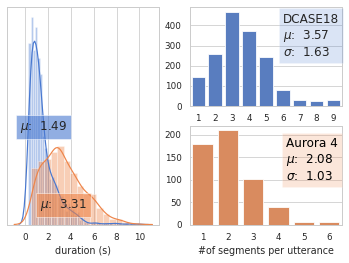

In [106]:
sns.set(context='paper', style='whitegrid')
colors = sns.color_palette('muted',6)
fig = plt.figure()
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[:, 0])
sns.distplot(dcase18['duration'], label='DCASE18', ax = ax3, color=colors[0])
sns.distplot(aurora_clean['duration'], label='Aurora-4', ax = ax3, color=colors[1])
ax3.set_xlabel('duration (s)')
ax3.set_xticks([0,2,4,6,8,10])
ax3.set_yticks([])
ax3.text(dcase18['duration'].mean() - 2.0, 0.28,r"""$\mu$: {:>5.2f}""".format(dcase18['duration'].mean()), fontsize=12, bbox=dict(facecolor=colors[0], alpha=0.6)) #
ax3.text(aurora_clean['duration'].mean() - 2.0, 0.05,r"""$\mu$: {:>5.2f}""".format(aurora_clean['duration'].mean()), fontsize=12, bbox=dict(facecolor=colors[1], alpha=0.6)) #

sns.countplot(x="#of segments per utterance", data=dcase18,color=colors[0],ax=ax1)
ax1.text(5.0, 250,r"""DCASE18
$\mu$: {:>5.2f}
$\sigma$: {:>5.2f}""".format(dcase18['#of segments per utterance'].mean(),dcase18['#of segments per utterance'].std()), fontsize=12, bbox=dict(facecolor=colors[0], alpha=0.2)) #

sns.countplot(x="#of segments per utterance", data=aurora_clean,color=colors[1],ax=ax2)
ax2.text(3.3, 100,r"""Aurora 4
$\mu$: {:>5.2f}
$\sigma$: {:>5.2f}""".format(aurora_clean['#of segments per utterance'].mean(),aurora_clean['#of segments per utterance'].std()), fontsize=12, color='black', bbox=dict(facecolor=colors[1],fill=True, alpha=0.2)) 
plt.savefig('data_distributions.pdf')

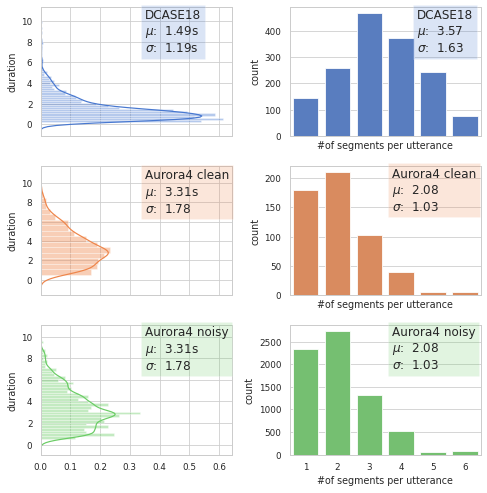

In [13]:
sns.set(context='paper',style='whitegrid')
colors = sns.color_palette("muted", 8)

f, axes = plt.subplots(3,2, sharex='col',figsize=(7,7),gridspec_kw={'height_ratios': [1, 1,1], 'width_ratios':[1,1]})
# sns.countplot(x="#of segments per utterance", data=df,ax=axes[0],hue='data')
sns.distplot(dcase18['duration'],label='DCASE18',ax=axes[0][0],color=colors[0],vertical=True,norm_hist=True)
axes[0][0].text(0.35, 7.0,r"""DCASE18
$\mu$: {:>5.2f}s
$\sigma$: {:>5.2f}s""".format(dcase18['duration'].mean(),dcase18['duration'].std()), fontsize=12, bbox=dict(facecolor=colors[0], alpha=0.2)) #add text
sns.distplot(aurora_clean['duration'], label='Aurora4 clean',ax=axes[1][0],color=colors[1],vertical=True,norm_hist=True)

axes[1][0].text(0.35, 7.0,r"""Aurora4 clean
$\mu$: {:>5.2f}s
$\sigma$: {:>5.2f}""".format(aurora_clean['duration'].mean(),aurora_clean['duration'].std()), fontsize=12, bbox=dict(facecolor=colors[1], alpha=0.2)) #add text

sns.distplot(aurora_noisy['duration'],label='Aurora4 noisy',ax=axes[2][0],color=colors[2],vertical=True,norm_hist=True)
axes[2][0].text(0.35, 7.0,r"""Aurora4 noisy
$\mu$: {:>5.2f}s
$\sigma$: {:>5.2f}""".format(aurora_noisy['duration'].mean(),aurora_noisy['duration'].std()), fontsize=12, bbox=dict(facecolor=colors[2], alpha=0.2)) #add text

# Counts 
sns.countplot(x="#of segments per utterance", data=dcase18,color=colors[0],ax=axes[0][1])
axes[0][1].text(3.5, 320,r"""DCASE18
$\mu$: {:>5.2f}
$\sigma$: {:>5.2f}""".format(dcase18['#of segments per utterance'].mean(),dcase18['#of segments per utterance'].std()), fontsize=12, bbox=dict(facecolor=colors[0], alpha=0.2)) #

sns.countplot(x="#of segments per utterance", data=aurora_clean,color=colors[1],ax=axes[1][1])
axes[1][1].text(2.7, 145,r"""Aurora4 clean
$\mu$: {:>5.2f}
$\sigma$: {:>5.2f}""".format(aurora_clean['#of segments per utterance'].mean(),aurora_clean['#of segments per utterance'].std()), fontsize=12, bbox=dict(facecolor=colors[1], alpha=0.2)) 
sns.countplot(x="#of segments per utterance", data=aurora_noisy,color=colors[2],ax=axes[2][1])
axes[2][1].text(2.7, 1900,r'''Aurora4 noisy
$\mu$: {:>5.2f}
$\sigma$: {:>5.2f}'''.format(aurora_noisy['#of segments per utterance'].mean(),aurora_noisy['#of segments per utterance'].std()), fontsize=12, bbox=dict(facecolor=colors[2], alpha=0.2)) 
f.tight_layout()
plt.savefig('data_distributions.pdf')

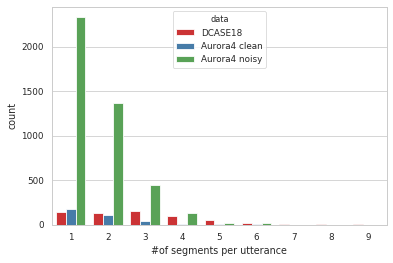

In [159]:
a = dcase18.groupby('filename')['event_label'].count().to_frame().reset_index()
a['data'] = 'DCASE18'
b = aurora_clean.groupby('filename')['event_label'].count().to_frame().reset_index()
b['data'] = 'Aurora4 clean'
c = aurora_noisy.groupby('filename')['event_label'].count().to_frame().reset_index()
c['data'] = 'Aurora4 noisy'
count_df = pd.concat((a,b,c))
count_df = count_df.rename({'event_label':'#of segments per utterance'},axis=1)
# count_df
sns.countplot(x="#of segments per utterance", data=count_df, hue='data',palette=colors)